In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
# reading the dataset
house = pd.read_csv("E:/Machine Learning/house prediction/train.csv", encoding = 'utf-8')
#("E:/Machine Learning/data set/day.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
house.shape

(1460, 81)

In [24]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
#checking duplicates
sum(house.duplicated(subset = 'Id')) == 0

True

In [27]:
# Checking for percentage nulls
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [28]:
#Checking for outlier in the numerical columns
house.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [29]:
house.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Method to remove outliers


In [30]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

(1453, 81)

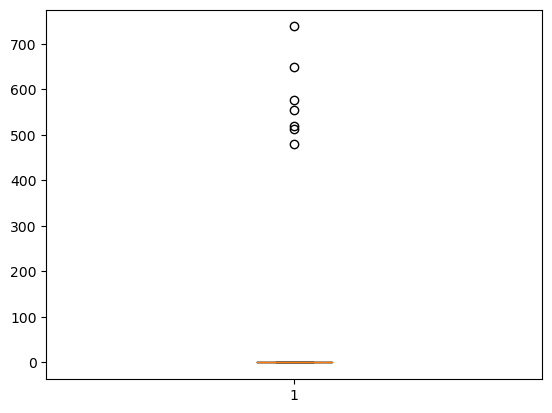

In [31]:
# outlier treatment
plt.boxplot(house['PoolArea'])
Q1 = house['PoolArea'].quantile(0.1)
Q3 = house['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (house['PoolArea'] <= Q3 + 1.5*IQR)]
house.shape

(1402, 81)

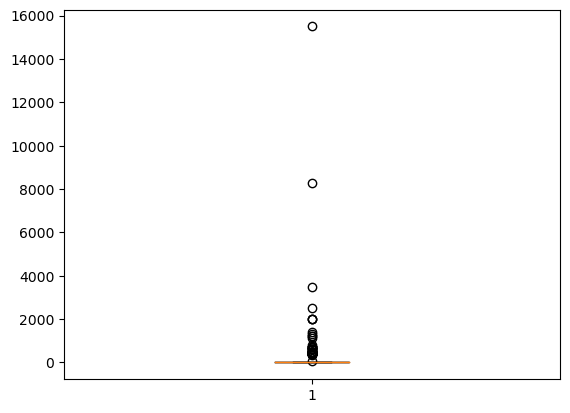

In [32]:
# outlier treatment
plt.boxplot(house['MiscVal'])
Q1 = house['MiscVal'].quantile(0.1)
Q3 = house['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (house['MiscVal'] <= Q3 + 1.5*IQR)]
house.shape

(1291, 81)

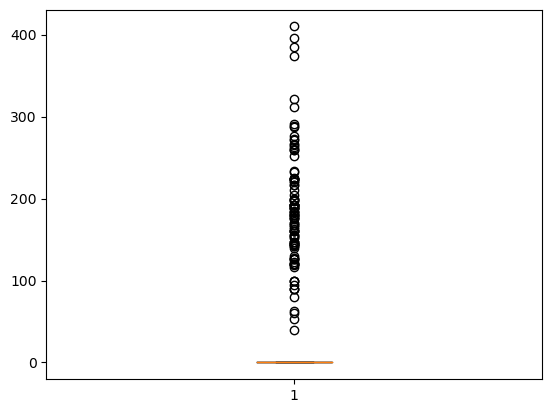

In [33]:
# outlier treatment
plt.boxplot(house['ScreenPorch'])
Q1 = house['ScreenPorch'].quantile(0.1)
Q3 = house['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (house['ScreenPorch'] <= Q3 + 1.5*IQR)]
house.shape

(1274, 81)

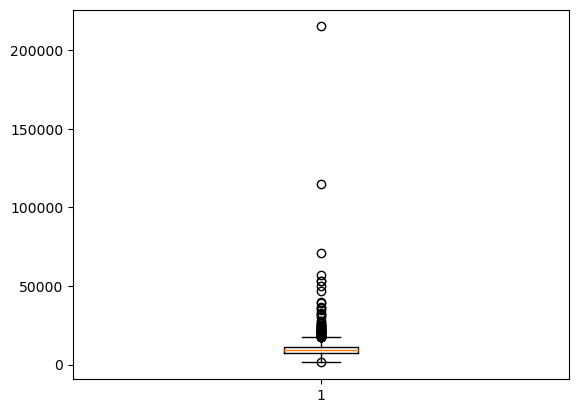

In [34]:
# outlier treatment
plt.boxplot(house['LotArea'])
Q1 = house['LotArea'].quantile(0.1)
Q3 = house['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house['LotArea'] <= Q3 + 1.5*IQR)]
house.shape

(1271, 81)

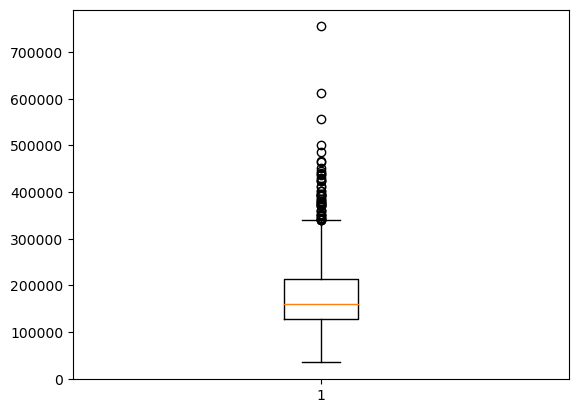

In [35]:
# outlier treatment
plt.boxplot(house['SalePrice'])
Q1 = house['SalePrice'].quantile(0.1)
Q3 = house['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house['SalePrice'] <= Q3 + 1.5*IQR)]
house.shape

In [36]:
#Checking the shape of the dataframe
house.shape

(1271, 81)

In [37]:
# since, it is clear that there are multiple columns with high nulls, lets group them together
house.columns[house.isnull().any()] 

null = house.isnull().sum()/len(house)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          100.000000
MiscFeature      99.842644
Alley            93.312352
Fence            81.667978
FireplaceQu      50.118017
LotFrontage      16.837136
GarageType        6.136900
GarageYrBlt       6.136900
GarageFinish      6.136900
GarageQual        6.136900
GarageCond        6.136900
BsmtExposure      2.753737
BsmtFinType2      2.753737
BsmtFinType1      2.675059
BsmtCond          2.675059
BsmtQual          2.675059
MasVnrArea        0.550747
MasVnrType        0.550747
Electrical        0.078678
dtype: float64

In [38]:
#separate numeric and categorical variables
#numeric_data
house.select_dtypes(include=[np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,0,113,0,0,0,0,0,10,2009,185000
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [39]:
#categorical_data
house.select_dtypes(exclude=[np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [40]:
# since, it is clear that there are multiple columns with high nulls, lets group them together
house.columns[house.isnull().any()] 

null = house.isnull().sum()/len(house)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          100.000000
MiscFeature      99.842644
Alley            93.312352
Fence            81.667978
FireplaceQu      50.118017
LotFrontage      16.837136
GarageType        6.136900
GarageYrBlt       6.136900
GarageFinish      6.136900
GarageQual        6.136900
GarageCond        6.136900
BsmtExposure      2.753737
BsmtFinType2      2.753737
BsmtFinType1      2.675059
BsmtCond          2.675059
BsmtQual          2.675059
MasVnrArea        0.550747
MasVnrType        0.550747
Electrical        0.078678
dtype: float64

# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price¶
Hence, we will first impute the categorical variables with 'None'

In [41]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
#null_with_meaning = ["Alley","MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
#for i in null_with_meaning:
 #   data[i].fillna("none", inplace=True)

In [44]:
# Check nulls once again

house.columns[house.isnull().any()] 

null_2 = house.isnull().sum()/len(house)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

PoolQC          100.000000
MiscFeature      99.842644
Alley            93.312352
Fence            81.667978
FireplaceQu      50.118017
LotFrontage      16.837136
GarageType        6.136900
GarageYrBlt       6.136900
GarageFinish      6.136900
GarageQual        6.136900
GarageCond        6.136900
BsmtExposure      2.753737
BsmtFinType2      2.753737
BsmtFinType1      2.675059
BsmtCond          2.675059
BsmtQual          2.675059
MasVnrArea        0.550747
MasVnrType        0.550747
Electrical        0.078678
dtype: float64

In [45]:
#NA in Alley column means No Alley, so we will replace NA by it.
house['Alley'].fillna('No Alley', inplace=True)
house['MasVnrType'].fillna('None', inplace=True) 

In [46]:
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
house['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [47]:

#NA in PoolQC column means No Pool, so we will replace NA by it.
house['PoolQC'].fillna('No Pool', inplace=True) 
#NA in Fence column means No Fence, so we will replace NA by it.
house['Fence'].fillna('No Fence', inplace=True) 
house['MasVnrArea'].fillna(0, inplace=True) 
house['LotFrontage'].fillna(0, inplace=True) 
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

house['GarageType'].fillna('No Garage', inplace=True) 
house['GarageFinish'].fillna('No Garage', inplace=True) 
house['GarageQual'].fillna('No Garage', inplace=True) 
house['GarageCond'].fillna('No Garage', inplace=True) 

house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# Data preparation and cleaning the data

In [48]:
# Some EDA on the cleaned data
# All numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [49]:
# Dropping ID Column
house_numeric = house_numeric.drop(['Id'], axis=1)
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


# Target variable 'sale Price' vs a few select columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Somerst'),
  Text(5, 0, 'OldTown'),
  Text(6, 0, 'BrkSide'),
  Text(7, 0, 'Sawyer'),
  Text(8, 0, 'NridgHt'),
  Text(9, 0, 'NAmes'),
  Text(10, 0, 'SawyerW'),
  Text(11, 0, 'IDOTRR'),
  Text(12, 0, 'MeadowV'),
  Text(13, 0, 'Edwards'),
  Text(14, 0, 'Timber'),
  Text(15, 0, 'Gilbert'),
  Text(16, 0, 'StoneBr'),
  Text(17, 0, 'ClearCr'),
  Text(18, 0, 'Mitchel'),
  Text(19, 0, 'NWAmes'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

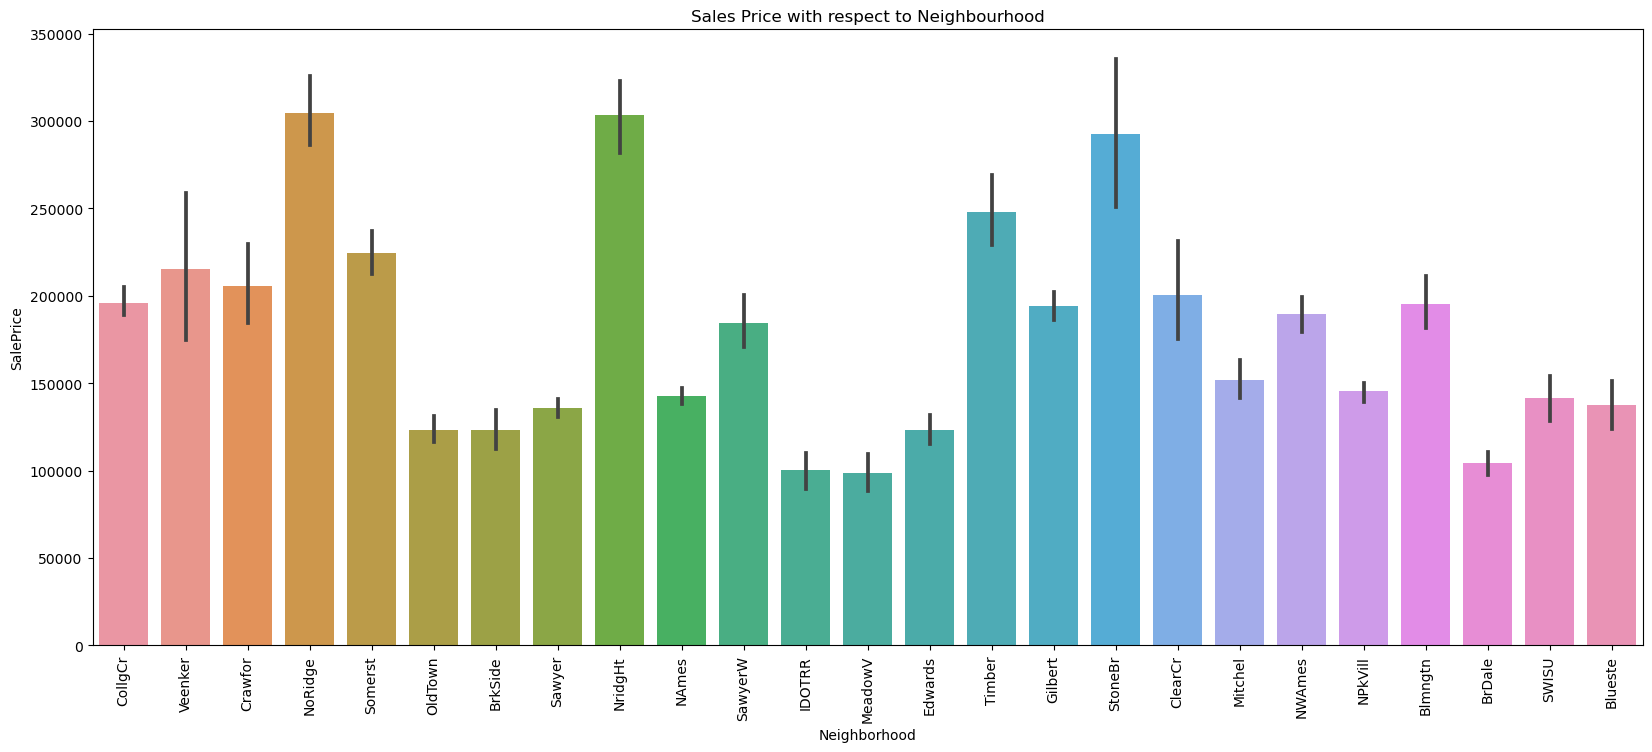

In [57]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice",data=house)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

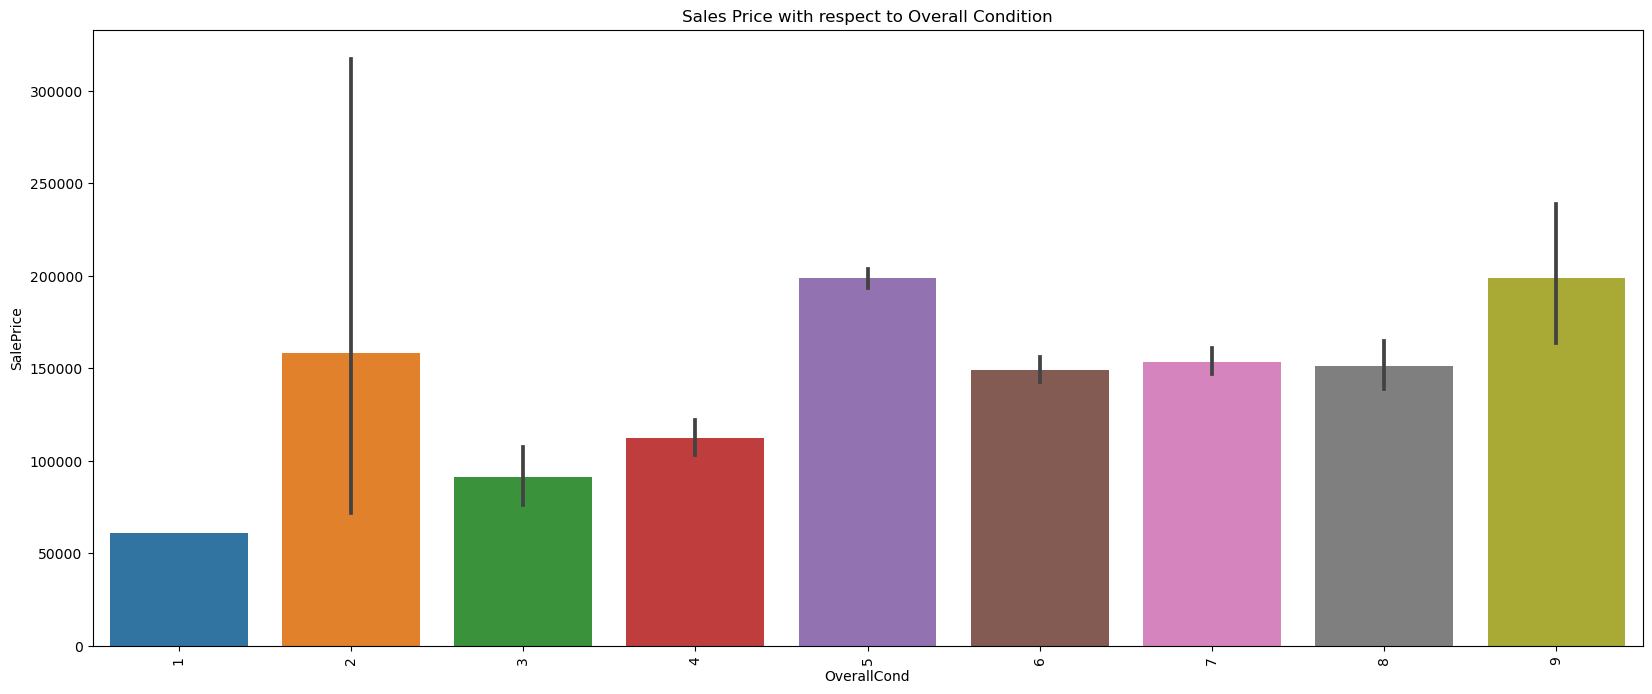

In [56]:
   # plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= house)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

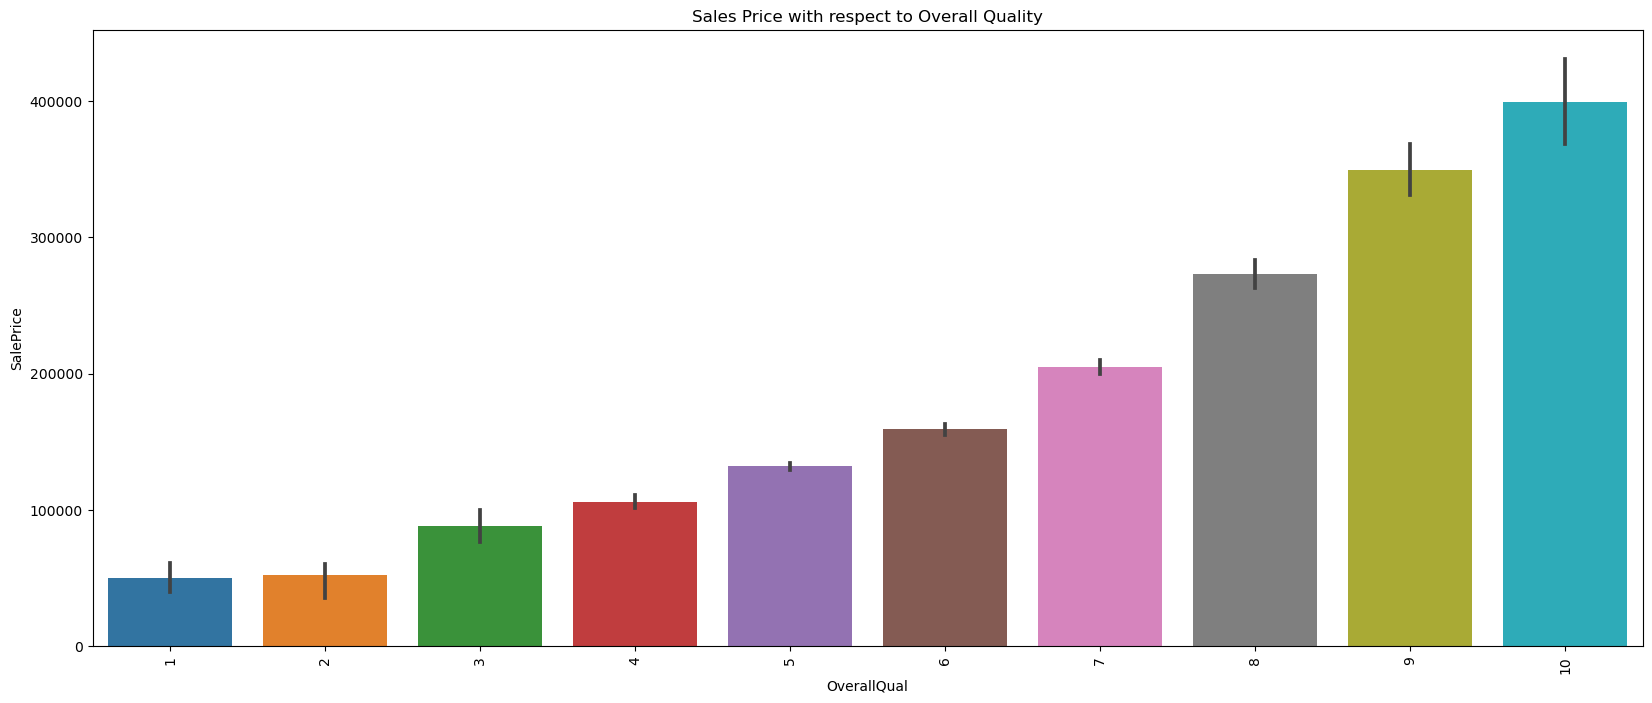

In [58]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= house)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

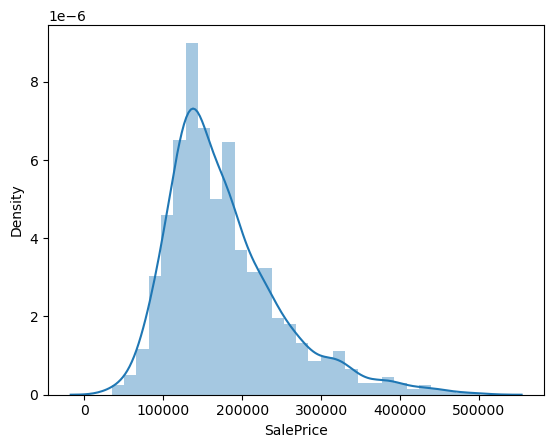

In [59]:
sns.distplot(house['SalePrice'])

In [60]:
data_raw = house.copy

# Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

In [61]:
#Log Transformation
house['SalePrice']=np.log1p(house['SalePrice'])

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

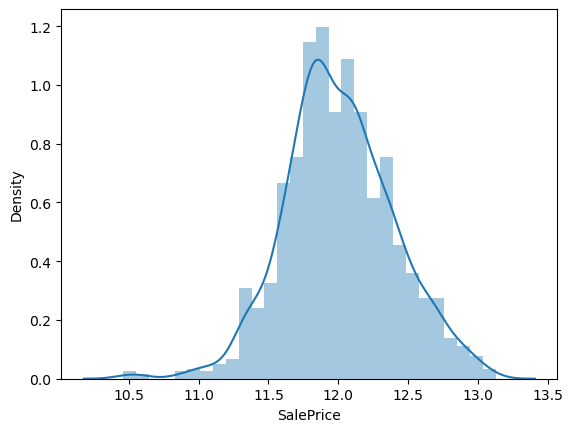

In [62]:
sns.distplot(house['SalePrice'])

In [63]:
# correlation matrix
cor = house_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.236396,-0.402102,0.025272,-0.059326,0.021730,0.032452,0.036024,-0.089712,-0.060813,...,-0.037281,-0.000639,-0.011994,-0.049050,NaN,NaN,NaN,-0.028879,-0.014925,-0.101273
LotFrontage,-0.236396,1.000000,0.257760,0.160658,-0.067081,0.041321,0.075937,0.087355,0.000689,-0.006877,...,-0.002407,0.046072,0.014427,0.021375,NaN,NaN,NaN,0.045923,0.005036,0.211180
LotArea,-0.402102,0.257760,1.000000,0.202114,-0.024796,0.073017,0.052301,0.133248,0.169714,0.063445,...,0.156098,0.121748,-0.003859,0.085410,NaN,NaN,NaN,0.027119,-0.022781,0.403750
OverallQual,0.025272,0.160658,0.202114,1.000000,-0.096447,0.584397,0.560978,0.394282,0.199661,-0.087058,...,0.272200,0.313058,-0.126700,0.042291,NaN,NaN,NaN,0.085096,-0.013654,0.814776
OverallCond,-0.059326,-0.067081,-0.024796,-0.096447,1.000000,-0.373517,0.065521,-0.117843,-0.024318,0.064118,...,0.010419,-0.030071,0.098252,0.036610,NaN,NaN,NaN,0.000629,0.043961,-0.092177
YearBuilt,0.021730,0.041321,0.073017,0.584397,-0.373517,1.000000,0.607581,0.309115,0.241133,-0.059657,...,0.235026,0.194155,-0.416744,0.025047,NaN,NaN,NaN,0.020339,-0.013105,0.569706
YearRemodAdd,0.032452,0.075937,0.052301,0.560978,0.065521,0.607581,1.000000,0.178023,0.115371,-0.075968,...,0.218985,0.253236,-0.211224,0.043256,NaN,NaN,NaN,0.033488,0.037326,0.543190
MasVnrArea,0.036024,0.087355,0.133248,0.394282,-0.117843,0.309115,0.178023,1.000000,0.212357,-0.060807,...,0.185257,0.091316,-0.111080,0.031333,NaN,NaN,NaN,0.018620,0.005316,0.468559
BsmtFinSF1,-0.089712,0.000689,0.169714,0.199661,-0.024318,0.241133,0.115371,0.212357,1.000000,-0.059622,...,0.205608,0.077635,-0.125117,0.033414,NaN,NaN,NaN,0.002868,0.030230,0.380942
BsmtFinSF2,-0.060813,-0.006877,0.063445,-0.087058,0.064118,-0.059657,-0.075968,-0.060807,-0.059622,1.000000,...,0.077193,-0.021110,0.051891,-0.029527,NaN,NaN,NaN,-0.012305,0.024412,-0.041973


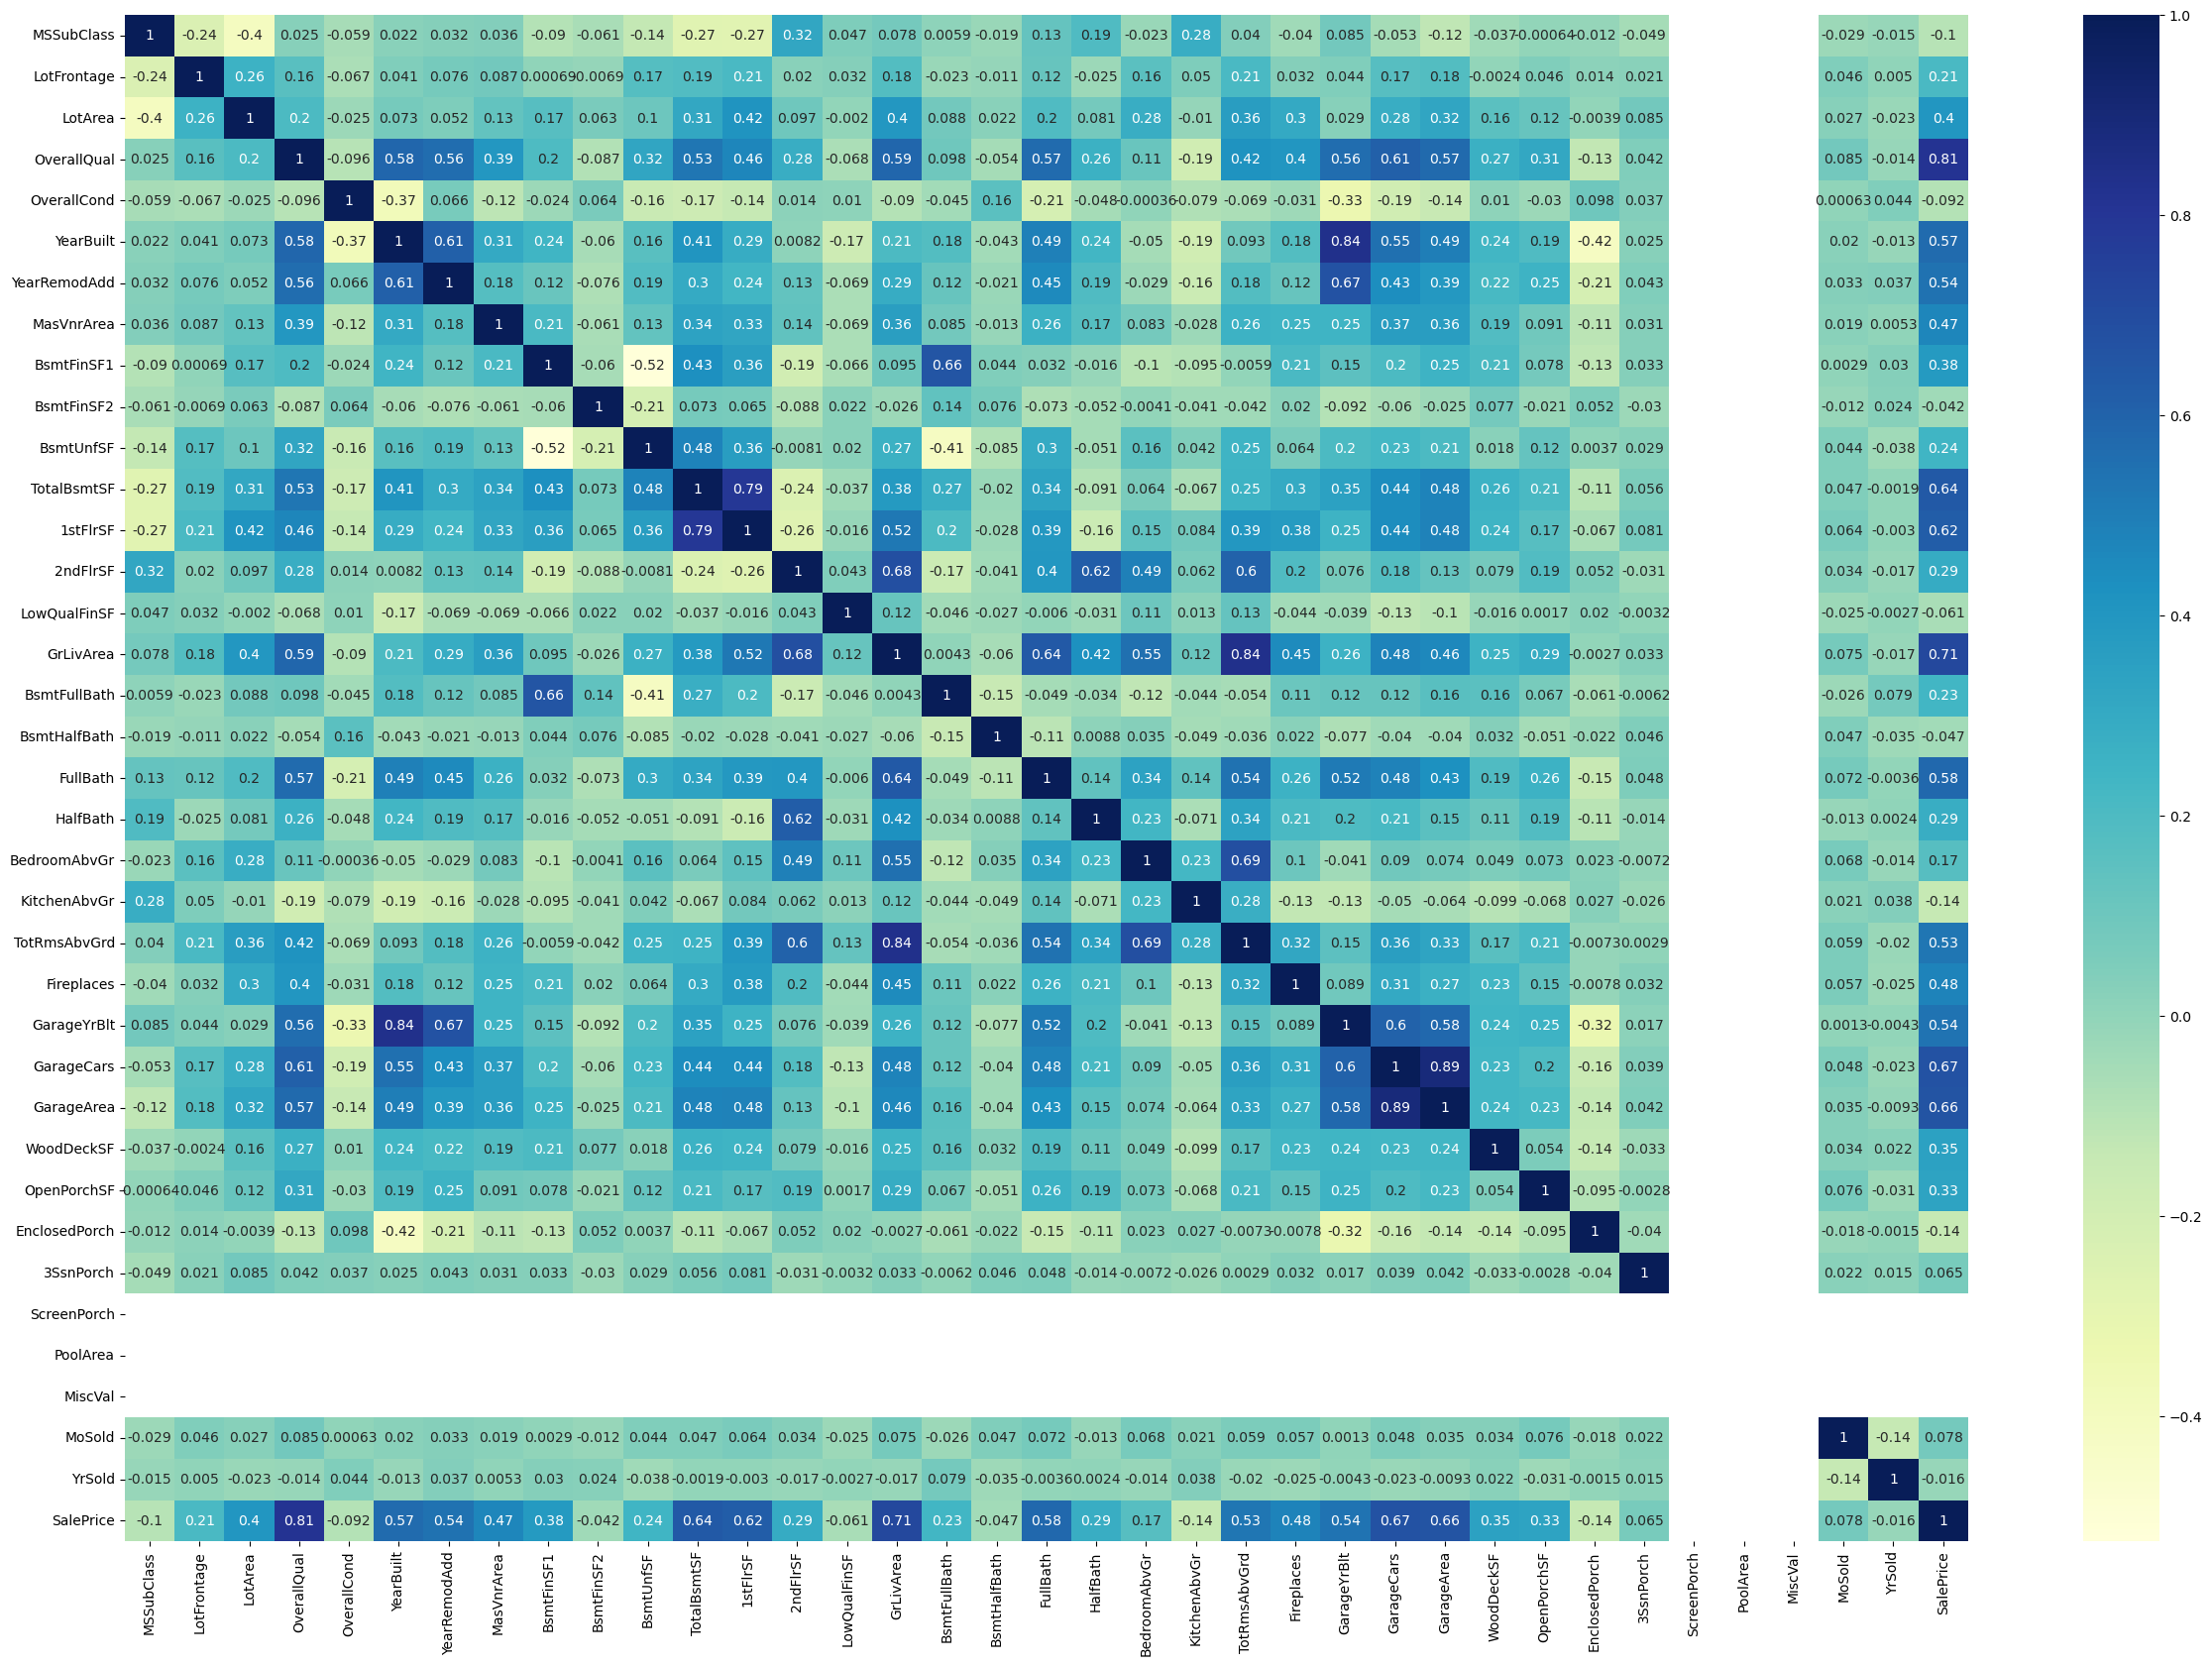

In [64]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

# We can see that some of the variables are correlated
#Before dropping these columns, we will first check their predictive power

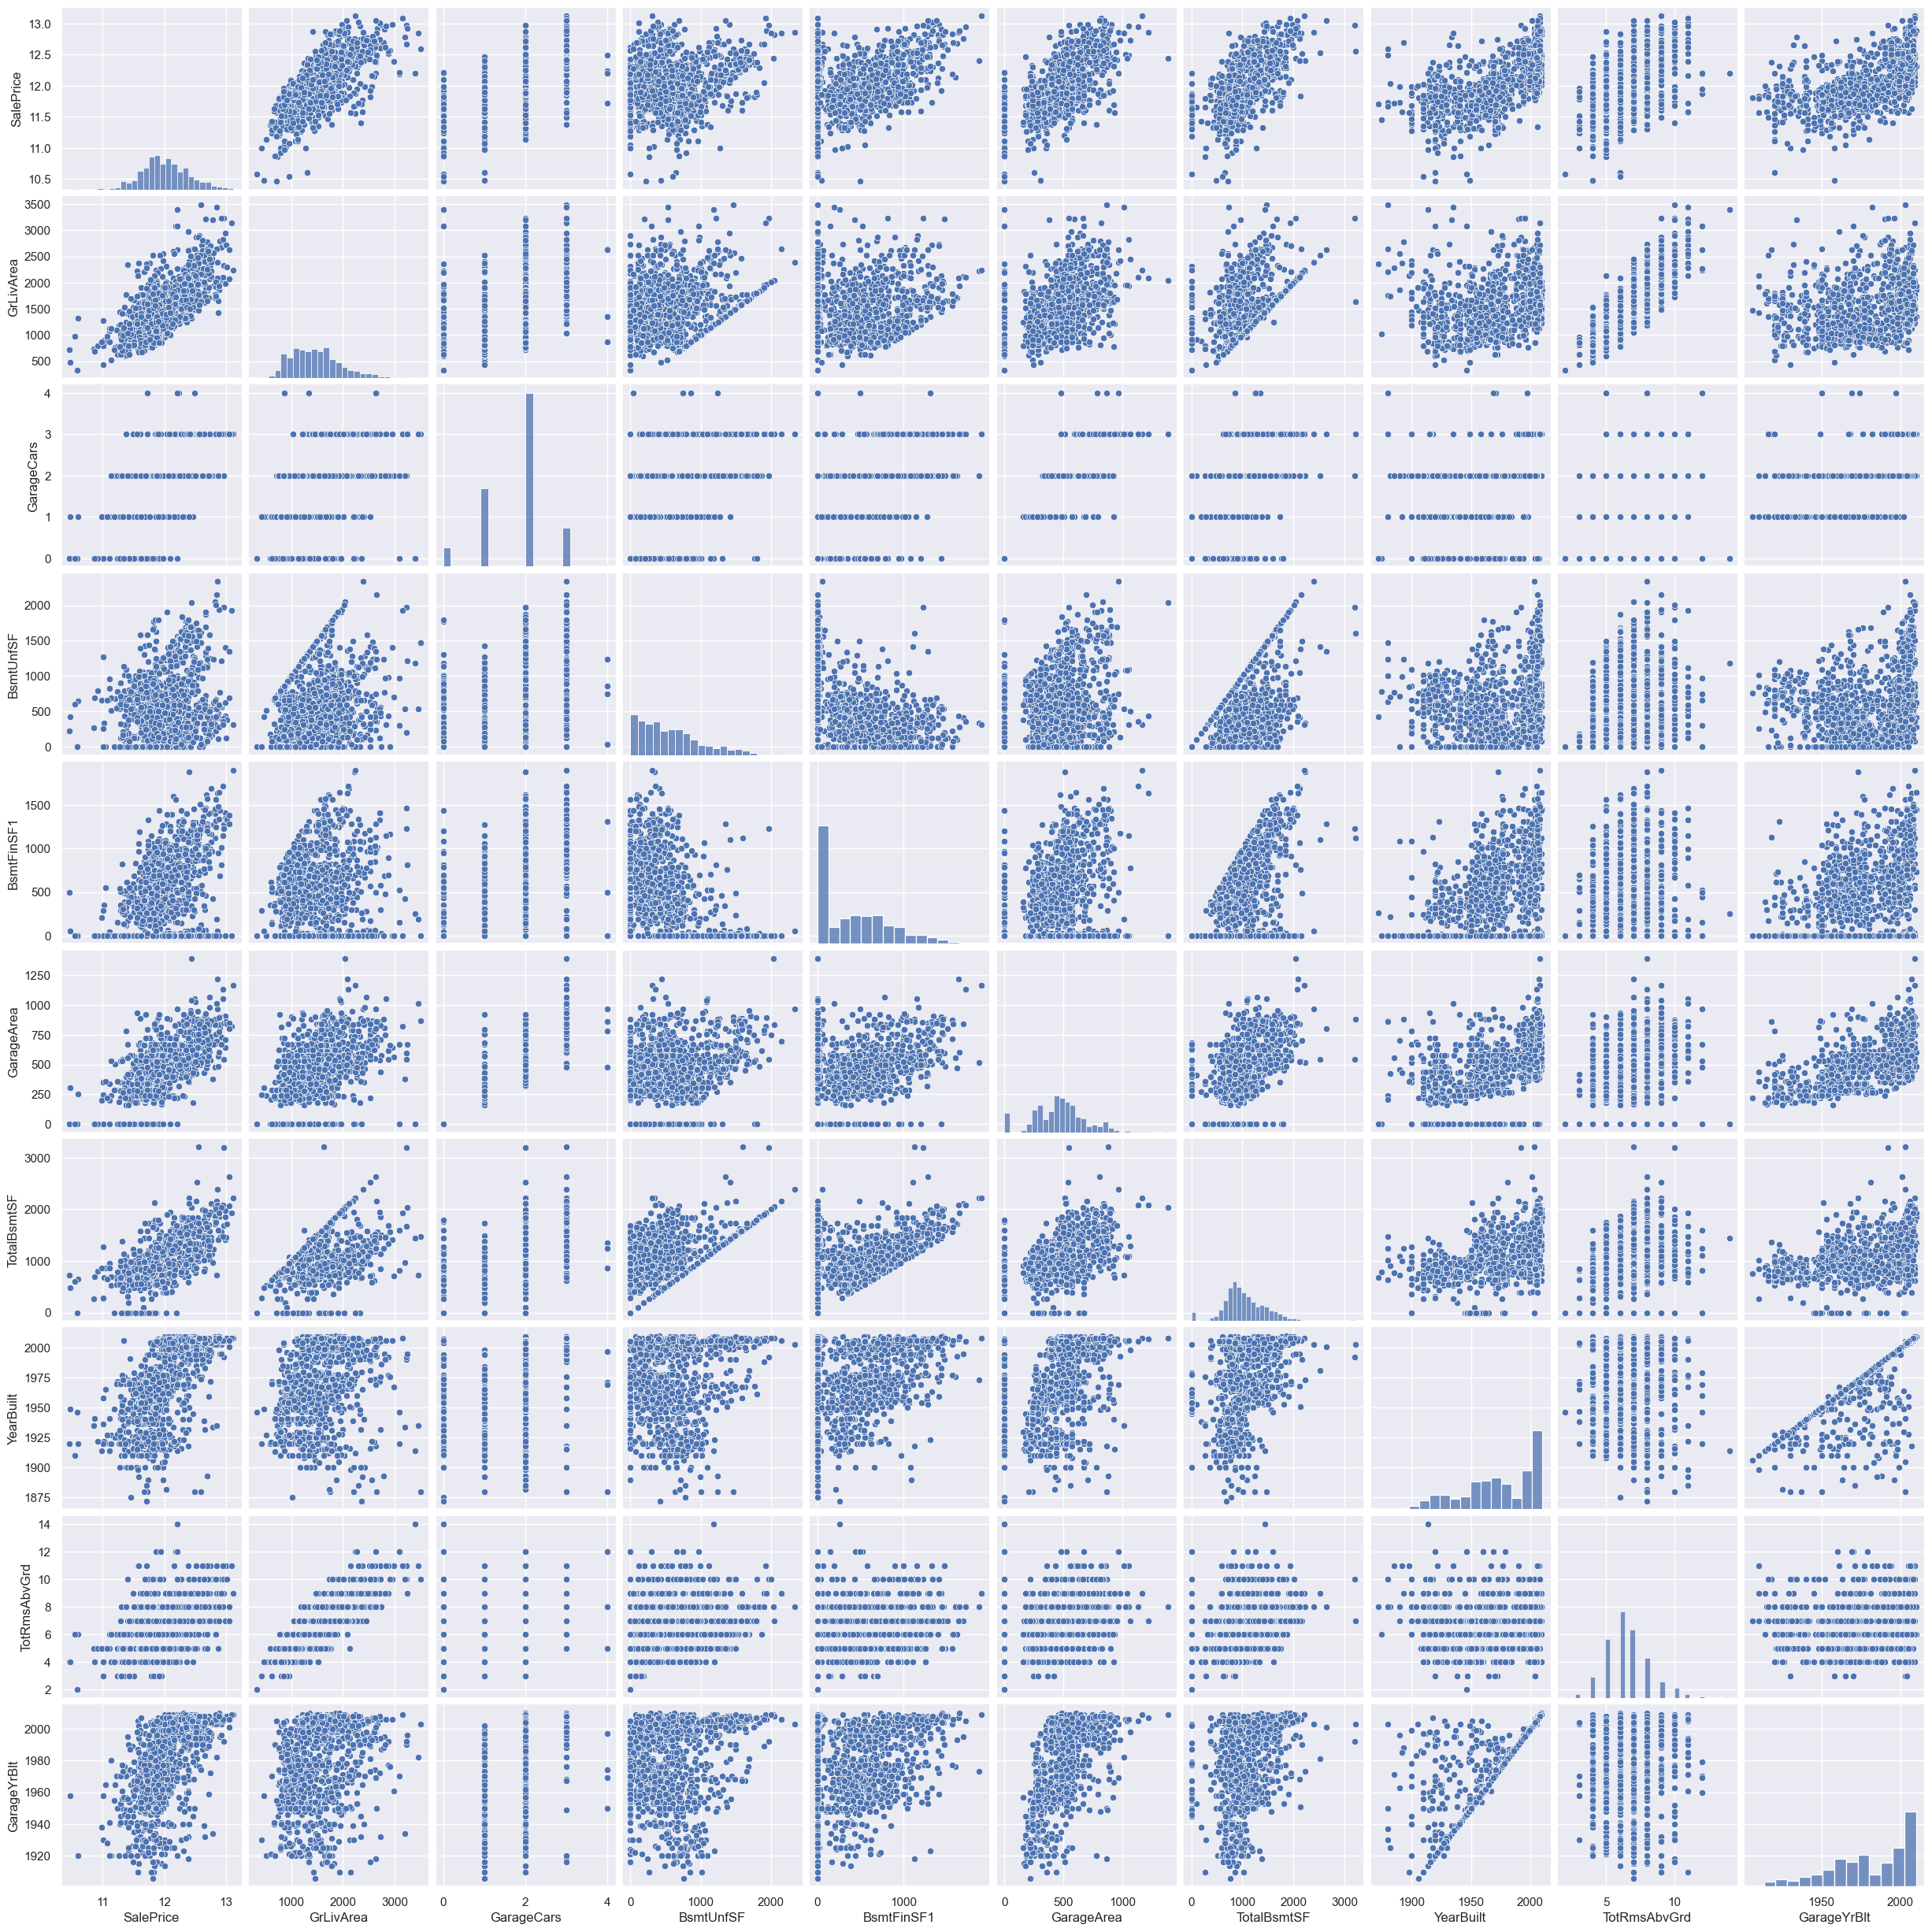

In [66]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house[cols], size = 2.5)
plt.show()

# Drop columns that are correlated and not contributing to 'SalePrice'

In [67]:
house = house.drop(['GarageCars'], axis = 1)
house =house.drop(['BsmtUnfSF'], axis = 1)
house = house.drop(['TotRmsAbvGrd'], axis = 1)
house =house.drop(['GarageYrBlt'], axis = 1)    

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,NaN,0,12,2008,WD,Normal,12.429220


In [68]:
#Numeric columns
house.select_dtypes(exclude=['object'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,0,113,0,0,0,0,0,10,2009,12.128117
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,12.072547
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,12.254868
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,11.864469


# We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [69]:
# PropAge -  Property Age from yearsold - yearbuilt
house['PropAge'] = (house['YrSold'] -house['YearBuilt'])
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,No Pool,No Fence,NaN,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,...,No Pool,No Fence,NaN,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,No Pool,No Fence,NaN,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,...,No Pool,No Fence,NaN,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,No Pool,No Fence,NaN,0,12,2008,WD,Normal,12.429220,8


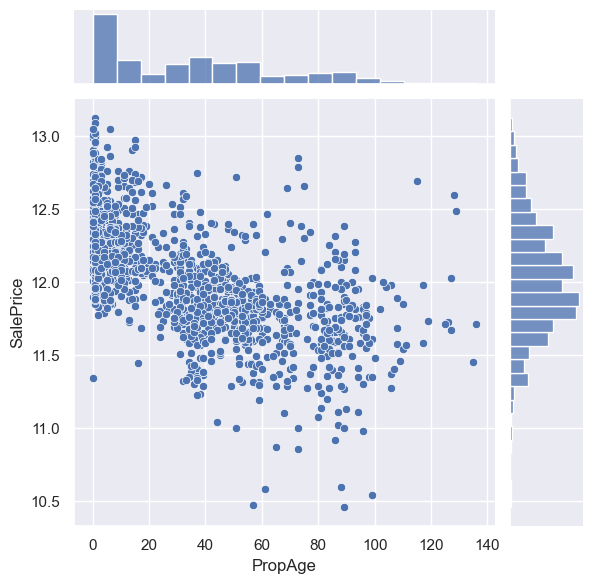

In [70]:
# PropAge vs SalePrice
sns.jointplot(x = house['PropAge'], y = house['SalePrice'])
plt.show()

# Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further

In [71]:
house =house.drop(['MoSold'], axis = 1)
house = house.drop(['YrSold'], axis = 1)
house = house.drop(['YearBuilt'], axis = 1)
house = house.drop(['YearRemodAdd'], axis = 1)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,NaN,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,...,0,0,No Pool,No Fence,NaN,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,NaN,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,NaN,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,NaN,0,WD,Normal,12.429220,8


In [72]:
house.Street.value_counts()

Pave    1269
Grvl       2
Name: Street, dtype: int64

In [73]:
house.Utilities.value_counts()

AllPub    1271
Name: Utilities, dtype: int64

In [74]:
# We can also drop columns that show very low variance and thus not required for predictions
house =house.drop(['Street'], axis = 1)
house = house.drop(['Utilities'], axis = 1)

In [75]:
house.shape

(1271, 72)

In [76]:
#type of each feature in data: int, float, object
types = house.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [77]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     41
int64      28
float64     3
Name: 0, dtype: int64

In [78]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'PropAge']


In [79]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# Creating Dummy columns to convert categorical into numerical

In [80]:
house = pd.get_dummies(house, drop_first=True )
house.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,196.0,706,0,856,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,0.0,978,0,1262,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,162.0,486,0,920,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,0.0,216,0,756,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,350.0,655,0,1145,...,0,0,0,0,1,0,0,0,1,0


In [81]:
# Drop 'Id' from Dataframe

house = house.drop(['Id'], axis=1)
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [82]:
X = house.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [83]:
# Putting response variable to y
y = house['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [84]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)
#X_train = s.fit_transform(X_train)
#X_test = s.fit_transform(X_test)
#scaler.fit(X)

In [85]:
from sklearn.preprocessing import StandardScaler
import scipy

In [86]:
scaler = StandardScaler()


X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])



In [87]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
202,-0.170999,-0.235354,-0.637362,-0.024688,0.395034,-0.565319,0.472377,-0.27443,-1.037285,-0.739950,...,0,0,0,0,0,0,0,0,1,0
768,-0.873702,0.370846,-0.086880,0.706902,-0.524299,-0.565319,-0.953075,-0.27443,2.044810,1.962334,...,0,0,0,0,1,0,0,0,1,0
1416,3.108280,0.067746,0.500300,-1.487868,0.395034,-0.565319,-1.010766,-0.27443,-0.640555,0.320369,...,0,0,0,0,1,0,0,0,1,0
1362,-0.170999,-1.750854,0.807784,-1.487868,-1.443632,-0.565319,-1.010766,-0.27443,-0.794288,0.417774,...,0,0,0,0,1,0,0,0,1,0
1140,-0.873702,0.067746,-0.545615,-0.756278,1.314367,-0.565319,1.037270,-0.27443,-0.206632,-0.497830,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
554,0.037798,0.839965,0.278685,0.578093,-0.434627,1.217458,1.040274,-0.288728,-0.114752,-0.427998,...,0,0,0,0,1,0,0,0,1,0
662,-0.886284,1.870744,1.057037,-0.141228,-2.219869,0.734270,-0.960035,-0.288728,0.822166,0.582023,...,0,0,0,0,1,0,0,0,1,0
1009,-0.193223,0.103695,-0.947848,-0.860549,-0.434627,-0.639003,-0.960035,-0.288728,-0.090973,-0.422764,...,0,0,0,0,1,0,0,0,1,0
259,-0.886284,0.398203,0.829499,-0.860549,-0.434627,-0.639003,-0.960035,-0.288728,-2.487962,-0.752460,...,0,0,0,0,1,0,0,0,1,0
224,-0.886284,1.370080,1.033700,2.736055,-0.434627,5.222837,-0.830685,-0.288728,3.200131,3.198656,...,0,0,0,0,1,0,0,0,1,0


# 3. Model Building and Evaluation

# Lets first check the model using Linear Regression and RFE (OPTIONAL)

In [89]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [90]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
#rfe = RFE(lm, 100) 
rfe = RFE(lm,n_features_to_select= 100,step=1)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False False False False False  True  True  True
  True False False False False False False False False False False False
 False  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False False  True  True
  True  True False False  True False False False  True False False False
 False False  True False False False False False  True False False  True
  True False  True False  True  True False False  True  True  True  True
 False False  True  True False False False  True False False False False
  True  True  True False False False  True False  True  True  True  True
  True  True False False  True  True False  True False  True False False
 False  True False  True  True  True  True False  True False  True False
  True  True False False False False False False  True  True  True False
 False False  True  True False False False False False False  True False
 False False False False False False False  True Fa

In [91]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 78),
 ('LotFrontage', False, 131),
 ('LotArea', False, 33),
 ('OverallQual', True, 1),
 ('OverallCond', False, 10),
 ('MasVnrArea', False, 128),
 ('BsmtFinSF1', False, 23),
 ('BsmtFinSF2', False, 109),
 ('TotalBsmtSF', False, 3),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 55),
 ('BsmtHalfBath', False, 116),
 ('FullBath', False, 63),
 ('HalfBath', False, 62),
 ('BedroomAbvGr', False, 114),
 ('KitchenAbvGr', False, 125),
 ('Fireplaces', False, 129),
 ('GarageArea', False, 43),
 ('WoodDeckSF', False, 115),
 ('OpenPorchSF', False, 100),
 ('EnclosedPorch', False, 122),
 ('3SsnPorch', False, 120),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Alley_No Alley', False, 16),
 ('Alley_Pave', False, 14),
 ('LotShape_IR2', False, 40),


In [92]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'PropAge', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAn', 'BldgType_Duplex', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofMatl_Roll', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Stone', 'Exterior1st_VinylSd',
       'Exterior

In [93]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath',
       ...
       'PavedDrive_P', 'PavedDrive_Y', 'Fence_GdWo', 'Fence_MnPrv',
       'Fence_MnWw', 'Fence_No Fence', 'SaleType_ConLI', 'SaleType_WD',
       'SaleCondition_Family', 'SaleCondition_Partial'],
      dtype='object', length=134)

In [94]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [95]:
X_train_rfe = pd.DataFrame(X_train[col])

In [96]:
X_train_rfe.head()

,OverallQual,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,ScreenPorch,PoolArea,MiscVal,PropAge,MSZoning_FV,...,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
202,-0.024688,-0.739950,0.234321,-0.114739,-0.351389,0.0,0.0,0,1.510297,0,...,0,0,0,0,0,0,0,0,0,1
768,0.706902,1.962334,-0.804622,-0.114739,0.731543,0.0,0.0,0,-1.114637,0,...,0,0,0,0,0,0,0,0,0,1
1416,-1.487868,0.320369,1.632810,-0.114739,1.666240,0.0,0.0,0,2.921198,0,...,0,0,0,0,0,0,0,0,0,1
1362,-1.487868,0.417774,0.262338,-0.114739,0.529780,0.0,0.0,0,1.739978,0,...,0,0,0,0,0,0,0,0,0,1
1140,-0.756278,-0.497830,-0.804622,-0.114739,-1.088441,0.0,0.0,0,0.690005,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
X_train_rfe.shape

(889, 100)

In [98]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9532778122567043

In [99]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-3.803755627253189e+19

# Since the Test R2 is too low, we will check for some alternate methods of Regression

In [100]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 78),
 ('LotFrontage', False, 131),
 ('LotArea', False, 33),
 ('OverallQual', True, 1),
 ('OverallCond', False, 10),
 ('MasVnrArea', False, 128),
 ('BsmtFinSF1', False, 23),
 ('BsmtFinSF2', False, 109),
 ('TotalBsmtSF', False, 3),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 55),
 ('BsmtHalfBath', False, 116),
 ('FullBath', False, 63),
 ('HalfBath', False, 62),
 ('BedroomAbvGr', False, 114),
 ('KitchenAbvGr', False, 125),
 ('Fireplaces', False, 129),
 ('GarageArea', False, 43),
 ('WoodDeckSF', False, 115),
 ('OpenPorchSF', False, 100),
 ('EnclosedPorch', False, 122),
 ('3SsnPorch', False, 120),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Alley_No Alley', False, 16),
 ('Alley_Pave', False, 14),
 ('LotShape_IR2', False, 40),


In [101]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'PropAge', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAn', 'BldgType_Duplex', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofMatl_Roll', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Stone', 'Exterior1st_VinylSd',
       'Exterior

In [102]:
X_test_rfe = X_test[col1]

In [103]:
X_test_rfe.head()

,OverallQual,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,ScreenPorch,PoolArea,MiscVal,PropAge,MSZoning_FV,...,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
554,0.578093,-0.427998,1.631753,-0.124502,1.066153,0.0,0.0,0,-0.957779,0,...,0,0,0,0,0,0,0,0,0,1
662,-0.141228,0.582023,-0.789786,-0.124502,-0.247519,0.0,0.0,0,0.198112,0,...,0,0,0,0,0,0,0,0,0,1
1009,-0.860549,-0.422764,-0.789786,9.780603,0.013609,0.0,0.0,0,1.450326,0,...,0,0,0,0,0,0,0,0,0,1
259,-0.860549,-0.752460,-0.789786,-0.124502,-1.271943,0.0,0.0,0,0.551301,0,...,0,0,0,0,0,0,0,0,0,1
224,2.736055,3.198656,-0.789786,-0.124502,1.761155,0.0,0.0,0,-0.925671,0,...,0,0,0,0,0,0,0,0,0,1


# Lasso and Ridge Regression
#Let's now try predicting house prices and perform lasso and ridge regression.

# Lasso Regression

In [104]:
# Checking the dimension of X_train & y_train
#print("X_train", X_train.shape)
#print("y_train", y_train.shape)

In [105]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.129431,0.053696,0.005910,0.004876,0.0001,{'alpha': 0.0001},-0.084465,-0.083609,-0.089610,-0.082386,...,-0.083489,0.003924,2,-0.059154,-0.058341,-0.058155,-0.059428,-0.059377,-0.058891,0.000536
1,0.025531,0.001352,0.003591,0.000489,0.001,{'alpha': 0.001},-0.073410,-0.083123,-0.086511,-0.077250,...,-0.079999,0.004544,1,-0.072204,-0.070422,-0.068565,-0.070503,-0.070970,-0.070533,0.001172
2,0.010372,0.001017,0.003192,0.000400,0.01,{'alpha': 0.01},-0.081709,-0.086657,-0.099294,-0.084290,...,-0.089125,0.006459,3,-0.087559,-0.086409,-0.085414,-0.087700,-0.085111,-0.086438,0.001064
3,0.011148,0.006983,0.002594,0.001493,0.05,{'alpha': 0.05},-0.101840,-0.115485,-0.131568,-0.107601,...,-0.114866,0.010106,4,-0.114235,-0.113059,-0.111407,-0.113142,-0.114941,-0.113357,0.001201
4,0.009973,0.001093,0.003590,0.000488,0.1,{'alpha': 0.1},-0.139550,-0.153731,-0.166907,-0.142774,...,-0.152876,0.010490,5,-0.152936,-0.150131,-0.150628,-0.151984,-0.153599,-0.151856,0.001319


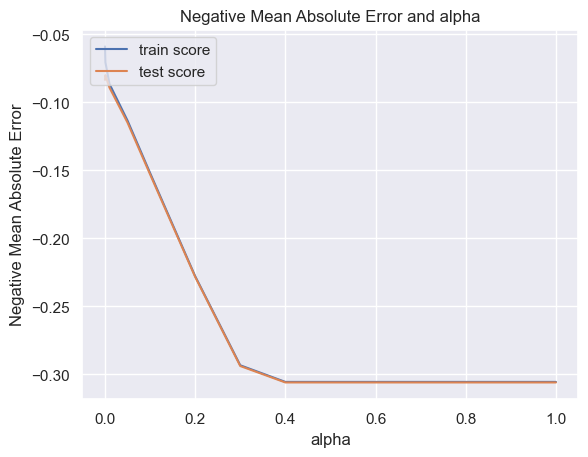

In [107]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [108]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.        ,  0.        ,  0.0335044 ,  0.11551006,  0.04513928,
        0.        ,  0.02856415,  0.        ,  0.03765496,  0.        ,
        0.        , -0.        ,  0.11846955,  0.01198002,  0.        ,
        0.00821195,  0.00175934, -0.        , -0.00863656,  0.01796548,
        0.04056022,  0.        ,  0.00584678,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.09037165,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.  

In [109]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.0),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.034),
 ('OverallQual', 0.116),
 ('OverallCond', 0.045),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.029),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.038),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.118),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.008),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.009),
 ('Fireplaces', 0.018),
 ('GarageArea', 0.041),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.006),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('PropAge', -0.09),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Alley_No Alley', -0.0),
 ('Alley_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig

In [110]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8955883703376541
0.8841238283141208


In [111]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.13744043014605858


In [112]:
#### The R2 values for Train and Test matches well, indicating an optimum model

In [113]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [114]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.000
1,MSSubClass,-0.000
2,LotFrontage,0.000
3,LotArea,0.034
4,OverallQual,0.116


In [115]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.000
13,GrLivArea,0.118
4,OverallQual,0.116
5,OverallCond,0.045
21,GarageArea,0.041
...,...,...
92,HouseStyle_2.5Fin,-0.000
176,HeatingQC_TA,-0.002
184,KitchenQual_TA,-0.004
19,KitchenAbvGr,-0.009


In [116]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.000
13,GrLivArea,0.118
4,OverallQual,0.116
5,OverallCond,0.045
21,GarageArea,0.041
9,TotalBsmtSF,0.038
3,LotArea,0.034
7,BsmtFinSF1,0.029
20,Fireplaces,0.018
14,BsmtFullBath,0.012


In [117]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(18, 2)

In [118]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'GarageArea', 'TotalBsmtSF', 'LotArea', 'BsmtFinSF1', 'Fireplaces', 'BsmtFullBath', 'FullBath', 'Foundation_PConc', 'OpenPorchSF', 'HalfBath', 'HeatingQC_TA', 'KitchenQual_TA', 'KitchenAbvGr', 'PropAge']


In [119]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
202,-0.351389,-0.024688,0.395034,-1.037285,-0.309519,0.472377,-0.911990,-0.637362,-0.235354,-0.799851,0,-0.729064,0.807402,0.0,-0.771915
768,0.731543,0.706902,-0.524299,2.044810,0.093746,-0.953075,0.725908,-0.086880,0.370846,-0.799851,1,-0.185973,0.807402,0.0,0.217261
1416,1.666240,-1.487868,0.395034,-0.640555,0.450119,-1.010766,-0.911990,0.500300,0.067746,-0.799851,1,-0.729064,0.807402,0.0,-0.771915
1362,0.529780,-1.487868,-1.443632,-0.794288,-0.450193,-1.010766,0.725908,0.807784,-1.750854,-0.799851,0,-0.729064,0.807402,0.0,-0.318543
1140,-1.088441,-0.756278,1.314367,-0.206632,1.763075,1.037270,-0.911990,-0.545615,0.067746,1.153632,0,-0.729064,-1.023670,0.0,-0.771915


In [120]:
X_train_lasso.shape

(889, 15)

In [121]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
554,1.066153,0.578093,-0.434627,-0.114752,1.823430,1.040274,0.700241,0.278685,0.839965,1.147763,1,0.188146,0.772943,0.0,1.975052
662,-0.247519,-0.141228,-2.219869,0.822166,0.458344,-0.960035,2.331291,1.057037,1.870744,1.147763,0,-0.709709,-1.144357,0.0,-0.781128
1009,0.013609,-0.860549,-0.434627,-0.090973,-2.207044,-0.960035,-0.930808,-0.947848,0.103695,-0.818360,0,-0.709709,0.772943,0.0,-0.781128
259,-1.271943,-0.860549,-0.434627,-2.487962,-0.781802,-0.960035,-0.930808,0.829499,0.398203,-0.818360,1,-0.058040,-1.144357,0.0,-0.781128
224,1.761155,2.736055,-0.434627,3.200131,2.272288,-0.830685,0.700241,1.033700,1.370080,-0.818360,1,0.810853,0.772943,0.0,1.354911


# Ridge Regression

In [122]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [123]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.060792,0.095510,0.007579,0.007687,0.0001,{'alpha': 0.0001},-0.091049,-0.090756,-0.096824,-0.089532,...,-0.090061,0.004693,27,-0.056636,-0.054921,-0.055765,-0.056520,-0.056999,-0.056168,0.000742
1,0.008976,0.001092,0.003391,0.000488,0.001,{'alpha': 0.001},-0.091018,-0.090736,-0.096792,-0.089483,...,-0.090031,0.004689,26,-0.056642,-0.054925,-0.055769,-0.056524,-0.057004,-0.056173,0.000742
2,0.009376,0.000797,0.003190,0.000399,0.01,{'alpha': 0.01},-0.090741,-0.090547,-0.096473,-0.089051,...,-0.089755,0.004646,25,-0.056692,-0.054964,-0.055803,-0.056559,-0.057054,-0.056214,0.000746
3,0.010091,0.004916,0.002591,0.001352,0.05,{'alpha': 0.05},-0.089833,-0.089914,-0.095250,-0.087842,...,-0.088836,0.004482,23,-0.056891,-0.055139,-0.055946,-0.056768,-0.057235,-0.056396,0.000757
4,0.012442,0.003899,0.000598,0.001196,0.1,{'alpha': 0.1},-0.089027,-0.089227,-0.094074,-0.086996,...,-0.088014,0.004314,22,-0.057111,-0.055370,-0.056108,-0.057039,-0.057406,-0.056607,0.000756


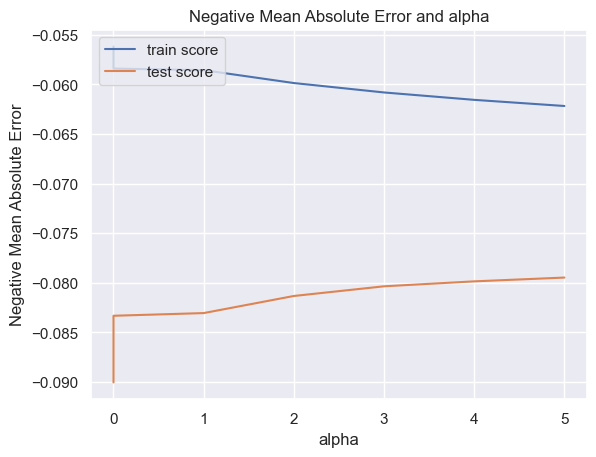

In [124]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [125]:
#since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [126]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.44375643e-02,  2.82316984e-03,  2.71673130e-02,  6.47994328e-02,
        5.29272658e-02,  5.19841617e-04,  1.96113837e-02,  8.47029323e-03,
        4.42444037e-02,  3.80087879e-02,  4.85541125e-02,  3.06066040e-03,
        7.12177224e-02,  1.69062647e-02,  4.71781944e-03,  1.86288230e-02,
        1.63717045e-02, -6.10938070e-03, -4.45616902e-03,  4.08862420e-03,
        2.13750326e-02,  7.33382388e-03,  1.02108229e-02,  6.52004844e-03,
        4.74052055e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -7.46874728e-02,  6.09075133e-02,  5.05891451e-02,  5.78422654e-02,
        4.39344778e-02, -2.04241609e-02, -9.62119638e-03,  2.67403329e-02,
       -1.32585137e-02,  5.97856504e-03,  2.77167485e-02, -1.28048944e-02,
        8.54570053e-03,  2.01611492e-02, -2.40351316e-02, -4.28510749e-02,
       -1.42586604e-02,  2.31726207e-03,  3.18464675e-02, -2.00605860e-02,
       -5.06445974e-02,  2.89831068e-02,  4.62223005e-03, -1.90209118e-02,
        1.18019169e-01, -

In [127]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.746),
 ('MSSubClass', -0.014),
 ('LotFrontage', 0.003),
 ('LotArea', 0.027),
 ('OverallQual', 0.065),
 ('OverallCond', 0.053),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.02),
 ('BsmtFinSF2', 0.008),
 ('TotalBsmtSF', 0.044),
 ('1stFlrSF', 0.038),
 ('2ndFlrSF', 0.049),
 ('LowQualFinSF', 0.003),
 ('GrLivArea', 0.071),
 ('BsmtFullBath', 0.017),
 ('BsmtHalfBath', 0.005),
 ('FullBath', 0.019),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', -0.006),
 ('KitchenAbvGr', -0.004),
 ('Fireplaces', 0.004),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.007),
 ('OpenPorchSF', 0.01),
 ('EnclosedPorch', 0.007),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('PropAge', -0.075),
 ('MSZoning_FV', 0.061),
 ('MSZoning_RH', 0.051),
 ('MSZoning_RL', 0.058),
 ('MSZoning_RM', 0.044),
 ('Alley_No Alley', -0.02),
 ('Alley_Pave', -0.01),
 ('LotShape_IR2', 0.027),
 ('LotShape_IR3', -0.013),
 ('LotShape_Reg', 0.006),
 ('LandContour_HLS', 0.028),
 ('LandContour_Low', -0.013

In [128]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9489951260166802
0.9058445449195285


In [131]:
# ridge regression
lm = Ridge(alpha=8)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.943047069531859
0.9087688618838461


In [132]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.12195201564210006


# It is visible that the model performance is better than Lasso. The train and the test scores are matching well

In [133]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [134]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.746
109,Exterior1st_BrkFace,0.121
53,Neighborhood_Crawfor,0.118
69,Neighborhood_StoneBr,0.097
190,Functional_Typ,0.086
118,Exterior1st_VinylSd,0.085
228,SaleType_Oth,0.084
169,Heating_GasW,0.080
233,SaleCondition_Normal,0.077
73,Condition1_Norm,0.075


In [135]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.746
109,Exterior1st_BrkFace,0.121
53,Neighborhood_Crawfor,0.118
69,Neighborhood_StoneBr,0.097
190,Functional_Typ,0.086
...,...,...
29,PropAge,-0.075
108,Exterior1st_BrkComm,-0.081
57,Neighborhood_MeadowV,-0.106
185,Functional_Maj2,-0.116


In [136]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,11.746
109,Exterior1st_BrkFace,0.121
53,Neighborhood_Crawfor,0.118
69,Neighborhood_StoneBr,0.097
190,Functional_Typ,0.086
...,...,...
29,PropAge,-0.075
108,Exterior1st_BrkComm,-0.081
57,Neighborhood_MeadowV,-0.106
185,Functional_Maj2,-0.116


In [137]:
predRFE.shape

(223, 2)

####Observation:
Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.
It is always advisable to use simple yet robust model.

####Equation can be formulated using the features and coefficients obtained by Lasso

In [140]:


pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16' ,'x17']), inplace = True) 
pred

,Variable,Coeff
C,constant,12.000
x1,GrLivArea,0.118
x2,OverallQual,0.116
x3,OverallCond,0.045
x4,GarageArea,0.041
x5,TotalBsmtSF,0.038
x6,LotArea,0.034
x7,BsmtFinSF1,0.029
x8,Fireplaces,0.018
x9,BsmtFullBath,0.012


In [142]:
Hence the equation:
Log(Y) = C + 0.118(x1) + 0.116(x2) + 0.045(x3) + 0.041(x4) + 0.038(x5) + 0.034(x6) + 0.029(x7) + 0.018(x8) + 0.012(x9) + 0.008(x10)
+ 0.007(x11) + 0.008(x12) - 0.002(x13) - 0.002(x14) - 0.004(x15) - 0.009(x16)- 0.090(x17) + Error term(RSS + alpha * (sum of absolute value of coefficients)

###INFERENCE

Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.

The higher values of positive coeeficients suggest a high sale value.
Some of those features are:-
Feature	Description
GrLivArea	-Above grade (ground) living area square feet
OverallQual	-Rates the overall material and finish of the house
OverallCond	-Rates the overall condition of the house
TotalBsmtSF	-Total square feet of basement area
GarageArea	-Size of garage in square feet

The higher values of negative coeeficients suggest a decrease in sale value.
Some of those features are:-
Feature	Description
PropAge	-Age of the property at the time of seeling
MSSubClass-	Identifies the type of dwelling involved in the sale
When the market value of the property is lower than the Predicted Sale Price, its the time to buy.
